# Industrial CO<sub>2</sub> Emission Analysis 

In [2]:
#importing necessary tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('darkgrid')
from sklearn.metrics import mean_absolute_error
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold


In [3]:
#loading data

df = pd.read_csv('world_co2.csv')

## Regression Model Using XGBoost
Here is a basic regression model that takes known industrial contributers to CO<sub>2</sub> emmissions into account. I will use XG boost for this step. The data given covers global:

1. Population - Billion
2. GDP - Trillion USD
3. Steel Production - Million Tonnes
4. Coal Production - Terawatt hour
5. Oil Production - Terawatt hour
6. Natural Gas Production - Terawatt hour
7. CO<sub>2</sub> - Billion tonnes

We will use these values to predict average temperature for a particular year, look at correlations, and determine which factors are most useful to the model in making emissons predictions.  

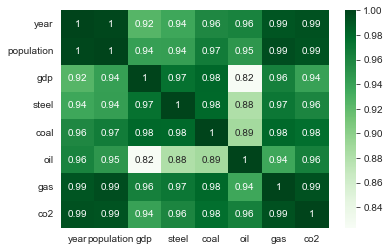

In [204]:
#looking at variable correlations 
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap = 'Greens', annot = True);

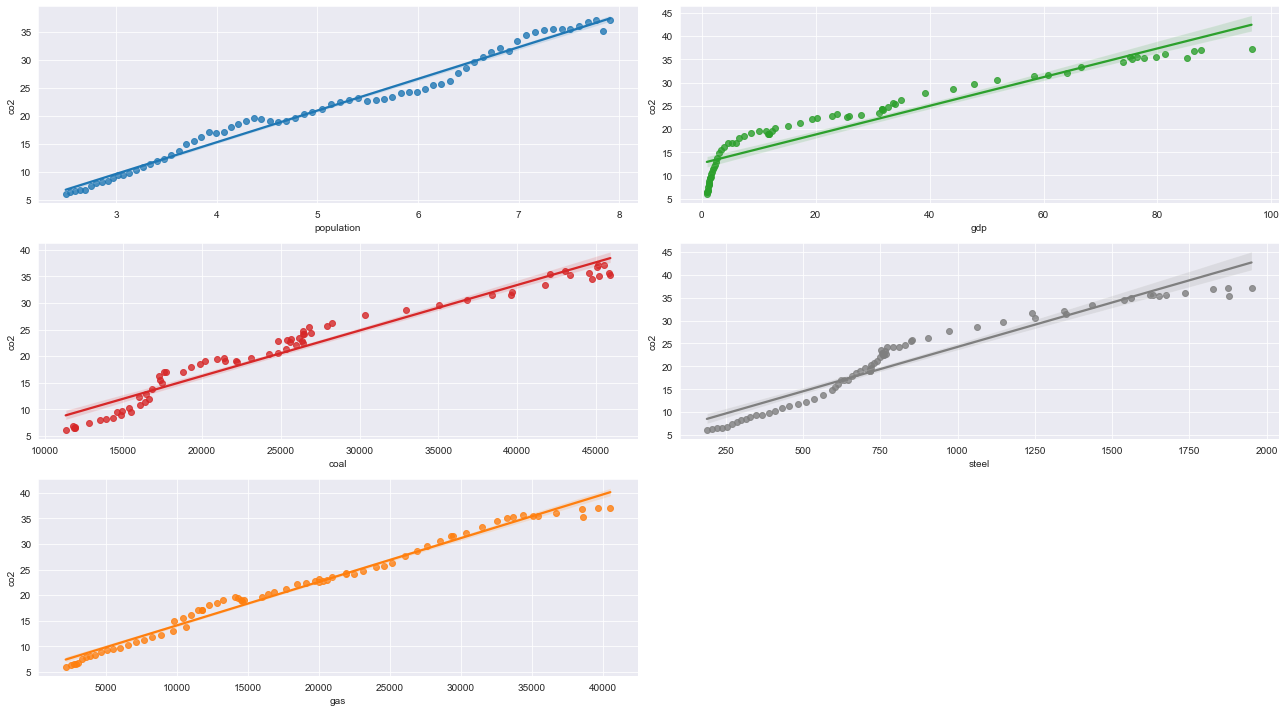

In [5]:
#visuals for relationships between X variables and Temp
fig, axes = plt.subplots(3, 2, figsize=(18, 10))
 
sns.regplot(ax=axes[0, 0], data=df, x='population', y='co2', color='Tab:Blue')
sns.regplot(ax=axes[0, 1], data=df, x='gdp', y='co2', color='Tab:Green')
sns.regplot(ax=axes[1, 0], data=df, x='coal', y='co2', color='Tab:Red')
sns.regplot(ax=axes[1, 1], data=df, x='steel', y='co2', color='Tab:Gray')
sns.regplot(ax=axes[2, 0], data=df, x='gas', y='co2', color='Tab:Orange')

fig.delaxes(axes[2, 1])
plt.tight_layout()

plt.show()

### Building XGBoost Model
Next we will perform a grid search to see which parameters perform best using MAE as the metric to optimize

In [206]:
#train test split
random_seed = 6
np.random.seed(random_seed)


X = df.drop(['co2','year'], axis=1)
y = df['co2']


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state=random_seed)

In [207]:
#creating parameter grid search for XGBoost Regressor
boost = XGBRegressor(objective='reg:squarederror')
param_grid = {
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'n_estimators': [100, 150, 200],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0, 0.01, 0.1, 1],
}


In [208]:
# Using K-Fold cross-validation with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=random_seed)

grid_boost = GridSearchCV(
    boost,
    param_grid,
    scoring='neg_mean_absolute_error',
    cv=kf,
    n_jobs=-1
)
grid_boost.fit(X_train, y_train)

best_parameters = grid_boost.best_params_

for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_boost.predict(X_train)
test_preds = grid_boost.predict(X_test)
training_MAE = mean_absolute_error(y_train, training_preds)
test_MAE = mean_absolute_error(y_test, test_preds)

# Printing results
print('')
print('Training MAE:', training_MAE)
print('Validation MAE:', test_MAE)

learning_rate: 0.15
max_depth: 3
min_child_weight: 1
n_estimators: 100
reg_alpha: 0.1
reg_lambda: 1

Training MAE: 0.03541612981267571
Validation MAE: 0.6171555940816245


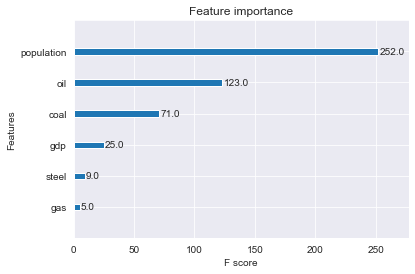

In [209]:
#fitting final model and identifying most important features
final_XGB = XGBRegressor(learning_rate = 0.15, 
                         max_depth = 3, 
                         min_child_weight = 1, 
                         n_estimators = 100,
                         reg_alpha = 0.1,
                         reg_lambda = 1)

final_XGB.fit(X_train, y_train);
xgboost.plot_importance(final_XGB);

# Regression Summary
The regression model is overfitting, predicting emissions given year based on the other values with an MAE score of .617 for the validation data as compared to .035 for test data. The most useful features for our tuned model were:
1. Population (251)
2. Oil (123)
3. Coal (71)
4. GDP (25.0)
5. Steel (9.0)
6. Gas (5.0)

## Conclusions

#### Space Holder

#### Space Holder

####  Space Holder

## Next Steps
